<a href="https://colab.research.google.com/github/dj-1087/BigContest-COIN/blob/master/%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1_VIF%EA%B8%B0%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import auth
auth.authenticate_user()
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
import pandas as pd

address = "/content/gdrive/My Drive/Colab Notebooks/Sample_DF/step_"
teamhitter = pd.read_csv(address+"team_hitter.csv", encoding = "utf-8")
teampitcher = pd.read_csv(address+"team_pitcher.csv", encoding = "utf-8")
teamhitter_r = pd.read_csv(address+"team_hitter_r.csv", encoding = "utf-8")
teampitcher_r = pd.read_csv(address+"team_pitcher_r.csv", encoding = "utf-8")
teamhitter_vs = pd.read_csv(address+"team_hitter_vs.csv", encoding = "utf-8")
teampitcher_vs = pd.read_csv(address+"team_pitcher_vs.csv", encoding = "utf-8")
starter_relief = pd.read_csv(address+"starter_relief.csv", encoding = "utf-8")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


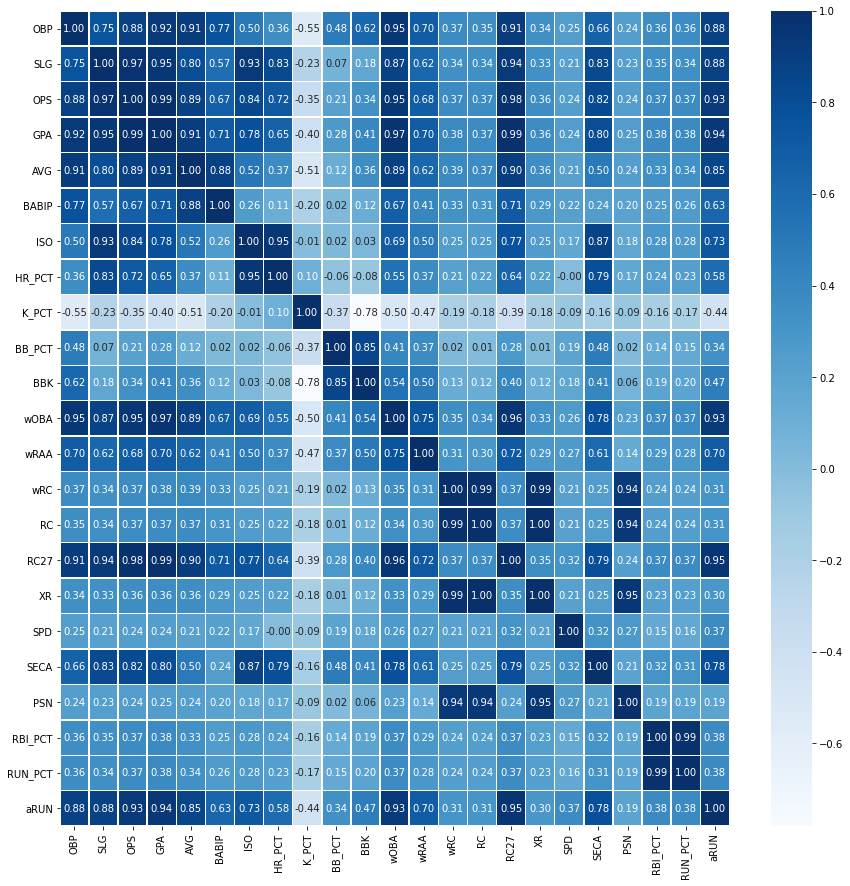

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns    

plt.figure(figsize=(15,15))
sns.heatmap(data = teamhitter.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [26]:
def toString(col_list):
  string = ""
  for i in enumerate(col_list):
    string += str(i[1])+"+"
  return string[:-1]

In [27]:
toString(teamhitter.columns)

'OBP+SLG+OPS+GPA+AVG+BABIP+ISO+HR_PCT+K_PCT+BB_PCT+BBK+wOBA+wRAA+wRC+RC+RC27+XR+SPD+SECA+PSN+RBI_PCT+RUN_PCT+aRUN'

In [28]:
teamhitter.columns

Index(['OBP', 'SLG', 'OPS', 'GPA', 'AVG', 'BABIP', 'ISO', 'HR_PCT', 'K_PCT',
       'BB_PCT', 'BBK', 'wOBA', 'wRAA', 'wRC', 'RC', 'RC27', 'XR', 'SPD',
       'SECA', 'PSN', 'RBI_PCT', 'RUN_PCT', 'aRUN'],
      dtype='object')

In [46]:
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

Y, X= dmatrices('aRUN~OBP+SLG+OPS+GPA+AVG+BABIP+ISO+HR_PCT+K_PCT+BB_PCT+BBK+wOBA+wRAA+wRC+RC+RC27+XR+SPD+SECA+PSN+RBI_PCT+RUN_PCT', teamhitter, return_type = 'dataframe')
for i in range()
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(by="VIF Factor",ascending=False)

,VIF Factor,features
0,33026.860669,Intercept
1,5482.250683,SLG
2,5384.523229,OPS
16,5177.184597,XR
14,4953.795103,RC
6,2682.438941,ISO
3,2375.939434,GPA
4,1228.769673,AVG
5,347.024482,BABIP
18,131.609535,SECA


In [30]:
toString(teampit.columns)

'ERA+RA9+ERC+FIP+kwERA+LOB+HR_PCT+K_PCT+BB_PCT+K9+BB9+HR9+KBB+whip+P_G+P_IP+P_PA+PFR+CYP+F_E+R_E+OAVG+OOBP+OSLG+OOPS+aR'

In [32]:
Y, X= dmatrices('aR~ERA+RA9+ERC+FIP+kwERA+LOB+HR_PCT+K_PCT+BB_PCT+K9+BB9+HR9+KBB+whip+P_G+P_IP+P_PA+PFR+CYP+F_E+R_E+OAVG+OOBP+OSLG+OOPS', teampitcher, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,4.264275e+06,Intercept
1,inf,ERA
2,inf,RA9
3,1.259610e+03,ERC
4,inf,FIP
5,7.764733e+03,kwERA
6,2.523293e+02,LOB
7,2.953010e+02,HR_PCT
8,2.490478e+03,K_PCT
9,1.410249e+03,BB_PCT


In [33]:
toString(teamhitter_r.columns)

'r_OBP+r_SLG+r_OPS+r_GPA+r_AVG+r_ISO+r_BABIP+r_HR_PCT+r_K_PCT+r_BB_PCT+r_BBK+r_wOBA+r_wRAA+r_wRC+r_RC+r_RC27+r_XR+r_SPD+r_SECA+r_PSN+r_aRUN'

In [35]:
Y, X= dmatrices('r_aRUN~r_OBP+r_SLG+r_OPS+r_GPA+r_AVG+r_ISO+r_BABIP+r_HR_PCT+r_K_PCT+r_BB_PCT+r_BBK+r_wOBA+r_wRAA+r_wRC+r_RC+r_RC27+r_XR+r_SPD+r_SECA+r_PSNvs_OBP+vs_HR_PCT+vs_K_PCT+vs_BB_PCT+vs_wRAA+vs_sPD+vs_PSN+vs_tRUN+vs_aRUN', teamhitter_r, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

PatsyError: ignored

In [ ]:
Y, X= dmatrices('R~LOB+HR_PCT+K_PCT+BB_PCT++P_PA+CYP+OAVG+tR', teampitcher, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(3)

,VIF Factor,features
0,6333.623,Intercept
1,2.524,LOB
2,2.165,HR_PCT
3,1.789,K_PCT
4,2.058,BB_PCT
5,2.045,P_PA
6,4.315,CYP
7,3.382,OAVG
8,1.965,tR


In [ ]:
Y, X= dmatrices('R~r_LOB+r_HR_PCT+r_BB_PCT+r_K9+r_KBB+r_P_G+r_P_PA+r_R_E+r_OAVG', teampitcher_r , return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(2)

,VIF Factor,features
0,1095.28,Intercept
1,1.64,r_LOB
2,1.15,r_HR_PCT
3,4.00,r_BB_PCT
4,2.02,r_K9
5,4.77,r_KBB
6,3.56,r_P_G
7,2.28,r_P_PA
8,1.16,r_R_E
9,2.52,r_OAVG


In [25]:
Y, X= dmatrices('R~vs_ERC+vs_HR_PCT+vs_K_PCT+vs_BB_PCT+vs_K9+vs_BB9+vs_KBB+vs_P_G+vs_CYP+vs_F_E+vs_R_E+vs_OAVG+vs_OSLG+vs_tR', teampitcher_vs , return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(2)

PatsyError: ignored